In [3]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
from astropy import units as u
from astroduet.bbmag import bb_abmag_fluence
from astroduet.image_utils import construct_image, find, ap_phot, run_daophot
from astroduet.config import Telescope
from astroduet.background import background_pixel_rate
from astroduet.utils import duet_abmag_to_fluence
from astropy.table import Table
from astropy.io import fits

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [25]:
from astropy.visualization import quantity_support
import matplotlib
font = {'family' : 'sans',
        'weight' : 'bold',
        'size'   : 18}

matplotlib.rc('font', **font)
plt.rcParams['figure.figsize'] = [15,8]

In [8]:
# Load fits tables with simulation results
hdu_src_rates = fits.open('../astroduet/data/src_rate_vs_gal_surfacebrightness.fits')
hdu_src_lims = fits.open('../astroduet/data/src_det_vs_gal_surfacebrightness.fits')
src_rates = hdu_src_rates[1].data
src_lims = hdu_src_lims[1].data

In [13]:
src_lims.columns

ColDefs(
    name = 'galmag'; format = 'D'
    name = 'srcmag'; format = 'D'
    name = 'src_rate_in_D1'; format = 'D'
    name = 'src_det_D1'; format = 'D'
    name = 'av_src_rate_psf_D1'; format = 'D'
    name = 'av_src_rate_psf_D1_err'; format = 'D'
    name = 'src_rate_in_D2'; format = 'D'
    name = 'src_det_D2'; format = 'D'
    name = 'av_src_rate_psf_D2'; format = 'D'
    name = 'av_src_rate_psf_D2_err'; format = 'D'
)

In [22]:
# Find detection limits for each galaxy surface brightness:
# Defined as the source magnitude where 90% of sources are detected
galmags = np.arange(15,25)
limmags = np.zeros([len(galmags),2])
for i, mag in enumerate(galmags):
    limmags[i,0] = src_lims['srcmag'][(src_lims['galmag'] == mag) & (src_lims['src_det_D1'] >= 0.9)][-1]
    limmags[i,1] = src_lims['srcmag'][(src_lims['galmag'] == mag) & (src_lims['src_det_D2'] >= 0.9)][-1]

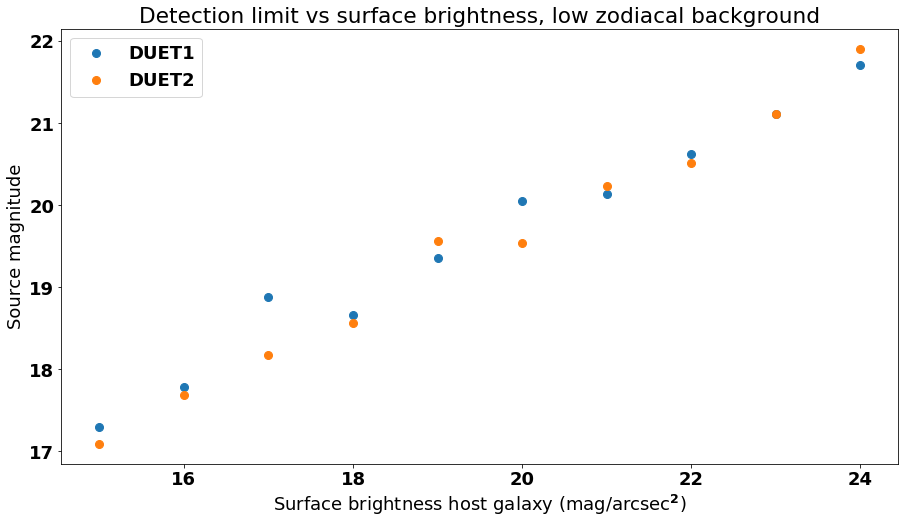

In [31]:
plt.plot(galmags,limmags[:,0], linestyle='None', marker='o', markersize=8, label='DUET1')
plt.plot(galmags,limmags[:,1], linestyle='None', marker='o', markersize=8, label='DUET2')

plt.legend()
plt.xlabel(r'Surface brightness host galaxy (mag/arcsec$^2$)')
plt.ylabel('Source magnitude')
plt.title('Detection limit vs surface brightness, low zodiacal background')
plt.show()

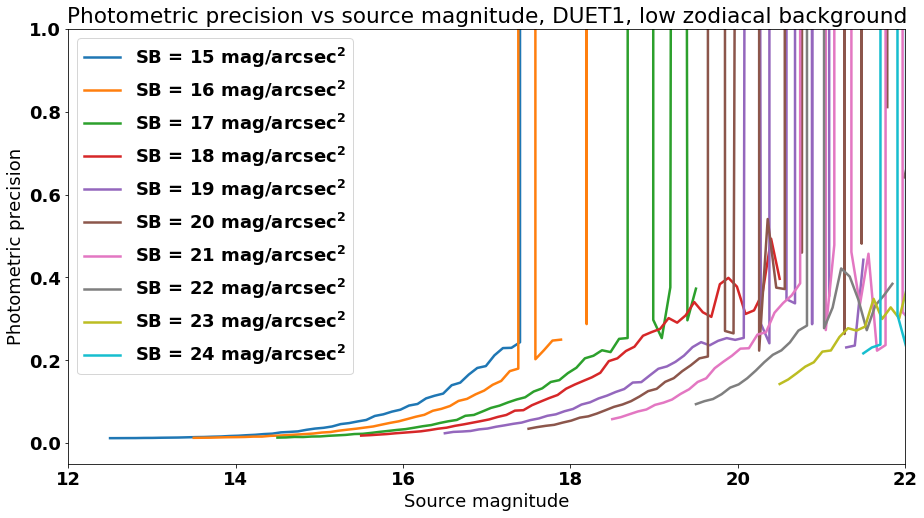

In [39]:
for mag in galmags:
    plt.plot(src_lims['srcmag'][src_lims['galmag'] == mag],
             src_lims['av_src_rate_psf_D1_err'][src_lims['galmag'] == mag]/src_lims['av_src_rate_psf_D1'][src_lims['galmag'] == mag],
            label='SB = '+str(mag)+r' mag/arcsec$^2$', linewidth=2.5)

plt.legend()
plt.ylim(-0.05,1)
plt.xlim(12,22)
plt.xlabel(r'Source magnitude')
plt.ylabel('Photometric precision')
plt.title('Photometric precision vs source magnitude, DUET1, low zodiacal background')
plt.show()

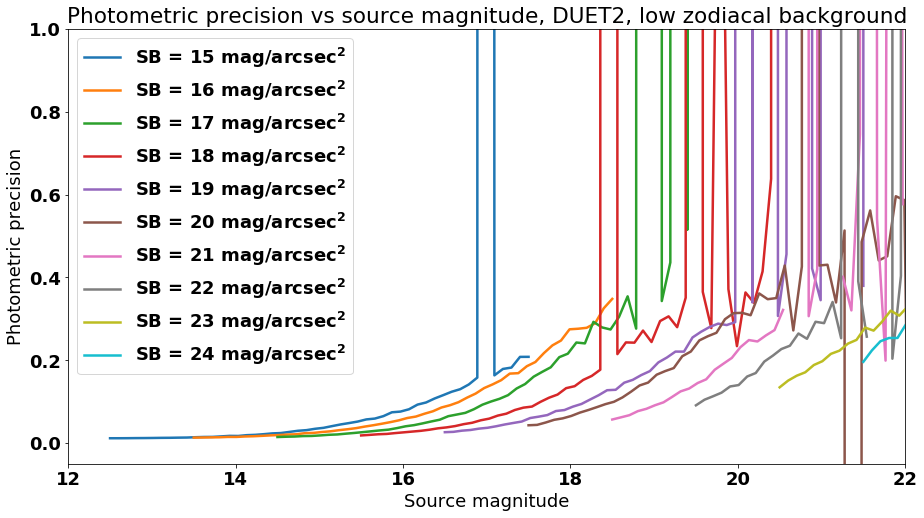

In [40]:
for mag in galmags:
    plt.plot(src_lims['srcmag'][src_lims['galmag'] == mag],
             src_lims['av_src_rate_psf_D2_err'][src_lims['galmag'] == mag]/src_lims['av_src_rate_psf_D2'][src_lims['galmag'] == mag],
            label='SB = '+str(mag)+r' mag/arcsec$^2$', linewidth=2.5)

plt.legend()
plt.ylim(-0.05,1)
plt.xlim(12,22)
plt.xlabel(r'Source magnitude')
plt.ylabel('Photometric precision')
plt.title('Photometric precision vs source magnitude, DUET2, low zodiacal background')
plt.show()